In [1]:
# 参数设置 
file_path = r'C:\Users\zhang\Desktop\md\2024corning\june\sphere_ti\static_0k_out.xyz'

In [2]:
# 设置中心点和计算参数
center = (32, 32, 32)
bin_size = 0.5
max_radius = 30
criteria = {'mid': ['Al','Si'], 'neibor': ['O'], 'cutoff': 2.2}

In [3]:
import math
import matplotlib.pyplot as plt

def read_xyz_data(filename):
    """读取XYZ格式的文件数据"""
    atoms = []
    with open(filename, 'r') as file:
        next(file)  # 跳过第一行（原子总数）
        next(file)  # 跳过第二行（注释行）
        for line in file:
            parts = line.split()
            if len(parts) == 4:  # 确保每行数据正确
                atom_type, x, y, z = parts
                atoms.append((atom_type, float(x), float(y), float(z)))
    return atoms

def calculate_cn_distribution(atoms, center, bin_size, max_radius, criteria):
    """计算不同Cn的数密度分布"""
    mid_types = criteria['mid']  # 中心原子类型
    neighbor_type = criteria['neibor']  # 邻居原子类型
    cutoff = criteria['cutoff']  # 截断距离

    # 初始化结果，最大Cn假设为C6
    results = {f'C{i}': [0] * (int(max_radius / bin_size) + 1) for i in range(7)}

    # 分类原子
    mid_atoms = [(x, y, z) for atom, x, y, z in atoms if atom in mid_types]

    neighbor_atoms = [(x, y, z) for atom, x, y, z in atoms if atom in neighbor_type]
    max_bin = int(max_radius / bin_size)
    # 遍历每个中心原子，计算配位数
    for mx, my, mz in mid_atoms:
        distance_to_center = math.sqrt((mx - center[0])**2 + (my - center[1])**2 + (mz - center[2])**2)
        bin_index = int(distance_to_center / bin_size)
        
        if bin_index < max_bin:
            cn_count = 0  # 计算每个中心原子的配位数
            for nx, ny, nz in neighbor_atoms:
                if math.sqrt((nx - mx)**2 + (ny - my)**2 + (nz - mz)**2) <= cutoff:
                    cn_count += 1
            cn_count = min(cn_count, 6)  # 限制最大配位数为C6
            results[f'C{cn_count}'][bin_index] += 1

    # 计算数密度
    for key in results:
        for i in range(len(results[key])):
            outer_radius = (i + 1) * bin_size
            inner_radius = i * bin_size
            shell_volume = 4/3 * math.pi * (outer_radius**3 - inner_radius**3)
            results[key][i] /= shell_volume  # 除以体积得到数密度

    return results

In [4]:
#  改版
def calculate_cn_distribution1(atoms, center, bin_size, max_radius, criteria):
    """计算不同Cn的数密度分布"""
    mid_types = criteria['mid']  # 中心原子类型
    neighbor_type = criteria['neibor']  # 邻居原子类型
    cutoff = criteria['cutoff']  # 截断距离

    # 初始化结果，最大Cn假设为C6
    results = {f'C{i}': [0] * (int(max_radius / bin_size) + 1) for i in range(0,6)}
    # 分类原子
    mid_atoms = [(x, y, z) for atom, x, y, z in atoms if atom in mid_types]
    neighbor_atoms = [(x, y, z) for atom, x, y, z in atoms if atom in neighbor_type]
    # 最远的距离
    max_bin = int(max_radius / bin_size)+1
    # 遍历每个中心原子，计算配位数
    for mx, my, mz in mid_atoms:
        distance_to_center = math.sqrt((mx - center[0])**2 + (my - center[1])**2 + (mz - center[2])**2)
        bin_index = int(distance_to_center / bin_size)
        # 只有符合要求的中心bin才计算
        if bin_index < len(results['C0']):
            cn_count = 0  # 计算每个中心原子的配位数
            for nx, ny, nz in neighbor_atoms:
                if math.sqrt((nx - mx)**2 + (ny - my)**2 + (nz - mz)**2) <= cutoff:
                    cn_count += 1
            cn_count = min(cn_count, 6)  # 限制最大配位数为C6
            results[f'C{cn_count}'][bin_index] += 1

    # 计算数密度
    for key in results:
        for i in range(len(results[key])):
            outer_radius = (i + 1) * bin_size
            inner_radius = i * bin_size
            shell_volume = 4/3 * math.pi * (outer_radius**3 - inner_radius**3)
            results[key][i] /= shell_volume  # 除以体积得到数密度

    return results

In [5]:
# 示例文件路径
filename = file_path
# 读取原子数据
atoms = read_xyz_data(filename)
# 计算配位数分布
coordination_numbers = calculate_cn_distribution(atoms, center, bin_size, max_radius, criteria)

自动坐标


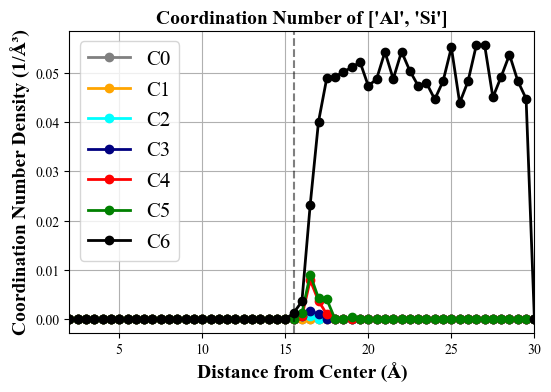

In [8]:
print('自动坐标')
# 设置全局字体为Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'
# 创建一个图形并设置清晰度
plt.figure(dpi=100) # ,figsize=(8, 6)

#绘图
# plt.figure(figsize=(10, 6))
colors = ['gray', 'orange', 'cyan', 'navy', 'red',  'green','black']  # 颜色列表
i_color = 0
for cn, densities in coordination_numbers.items():
    radii = [i * bin_size for i in range(len(densities))]
    plt.plot(radii, densities, label=cn,marker='o', color = colors[i_color],linewidth = 2.0)
    i_color+=1
    
ele_name = criteria['mid']
plt.title(f'Coordination Number of {ele_name}', fontsize=14, fontweight='bold')
plt.xlabel('Distance from Center (Å)', fontsize=14, fontweight='bold')
plt.ylabel('Coordination Number Density (1/Å³)', fontsize=14, fontweight='bold')
plt.axvline(x=15.5, color='black', linestyle='--', alpha=0.5)
plt.xlim(2,30)
# plt.ylim(0,0.2)

plt.grid(True)
plt.legend(prop={'size':15})
plt.show()


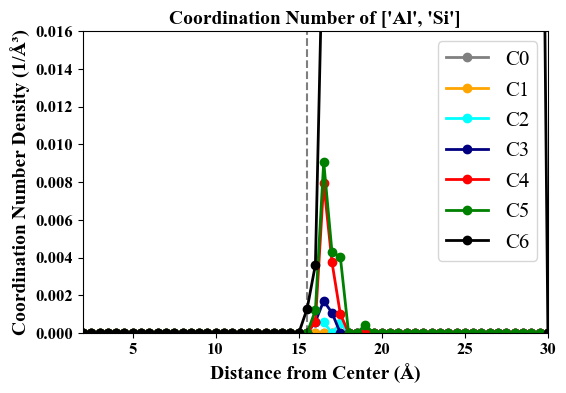

In [9]:
# 设置全局字体为Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'
# 创建一个图形并设置清晰度
plt.figure(dpi=100) # ,figsize=(8, 6)

#绘图
# plt.figure(figsize=(10, 6))
colors = ['gray', 'orange', 'cyan', 'navy', 'red',  'green','black']  # 颜色列表
i_color = 0
for cn, densities in coordination_numbers.items():
    radii = [i * bin_size for i in range(len(densities))]
    plt.plot(radii, densities, label=cn,marker='o', color = colors[i_color],linewidth = 2.0)
    i_color+=1

# 设置X轴和Y轴的刻度值的字体为黑体和字体大小
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

ele_name = criteria['mid']
plt.title(f'Coordination Number of {ele_name}', fontsize=14, fontweight='bold')
plt.xlabel('Distance from Center (Å)', fontsize=14, fontweight='bold')
plt.ylabel('Coordination Number Density (1/Å³)', fontsize=14, fontweight='bold')
plt.axvline(x=15.5, color='black', linestyle='--', alpha=0.5)
plt.xlim(2,30)
plt.ylim(0,0.016)

#plt.grid(True)
plt.legend(prop={'size':15})
plt.show()
